In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from noisereduce import reduce_noise
from IPython.display import Audio, display
from scipy.fftpack import dct

w \cdot v_1 + (1-w) \cdot v_2

1764.0


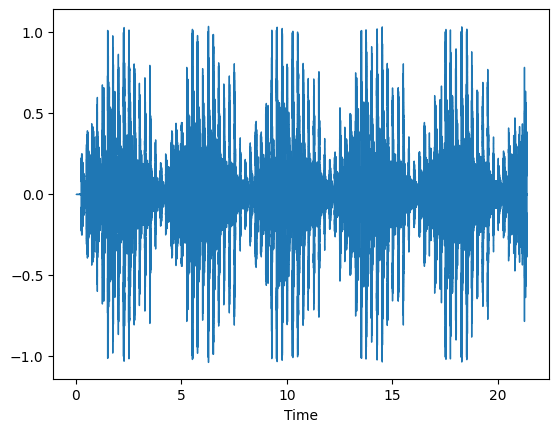

In [2]:
audio_file = '/Users/sahil/Programs/projects/AUDIONET/assignments/data/drums.mp3'  
y, sr = librosa.load(audio_file, sr=None)  
librosa.display.waveshow(y)
display(Audio(y,rate=sr))
print(sr/25)

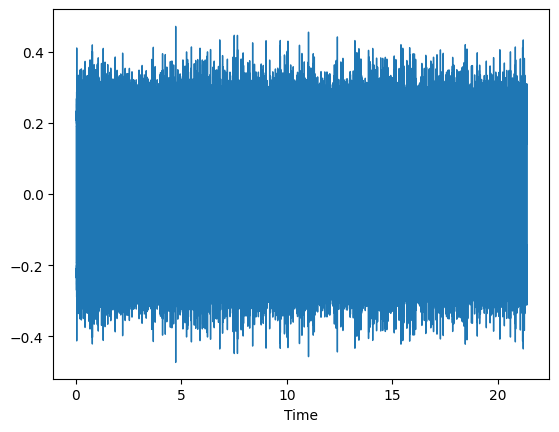

In [3]:
mean = 0
std_dev = 0.1 
noise = np.random.normal(mean, std_dev, y.shape)
librosa.display.waveshow(noise)
display(Audio(noise,rate=sr))

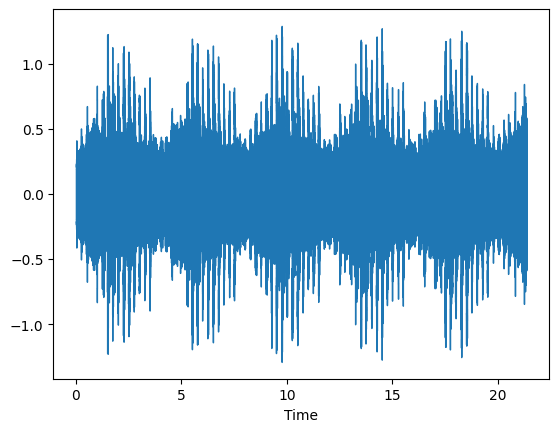

In [4]:
noisy_audio = y + noise
librosa.display.waveshow(noisy_audio)
display(Audio(noisy_audio,rate=sr))

In [5]:
output_file = '/Users/sahil/Programs/projects/AUDIONET/assignments/data/noisy_drums.mp3'
sf.write(output_file, noisy_audio, sr)

/var/folders/37/x82lvgr524l4fd08t3g06rl40000gn/T/ipykernel_33921/1600772517.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)


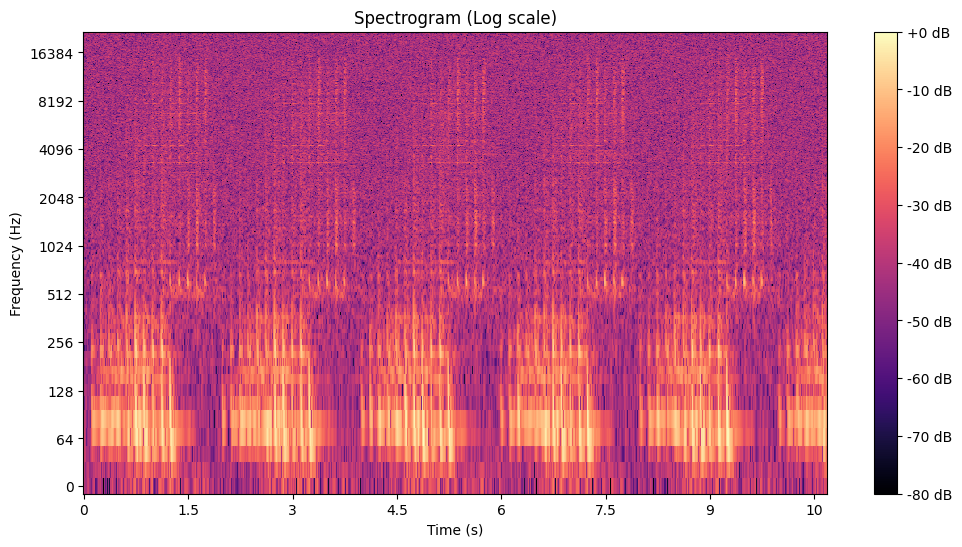

In [6]:
def spectrogram(audio_signal,sr):
    D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')  
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Log scale)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()
spectrogram(noisy_audio,sr)

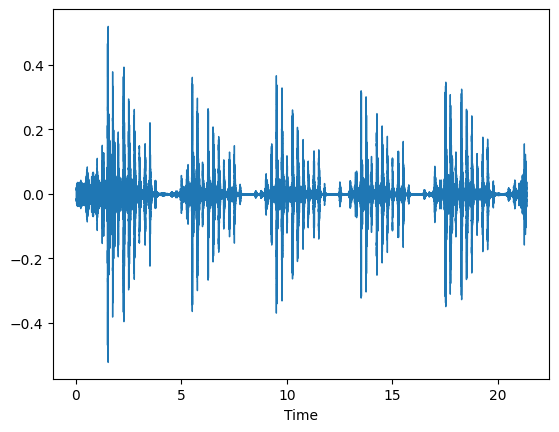

In [7]:
cleansed_audio=reduce_noise(y=noisy_audio, sr=sr, n_fft=2048, hop_length=512)
librosa.display.waveshow(cleansed_audio)

In [8]:
peak=np.max(np.abs(cleansed_audio))
Normalised_audio=cleansed_audio
output_file = '/Users/sahil/Programs/projects/AUDIONET/assignments/data/cleaned_and_normalised_noisy_drums.mp3'
sf.write(output_file, Normalised_audio, sr)
display(Audio(Normalised_audio,rate=sr))

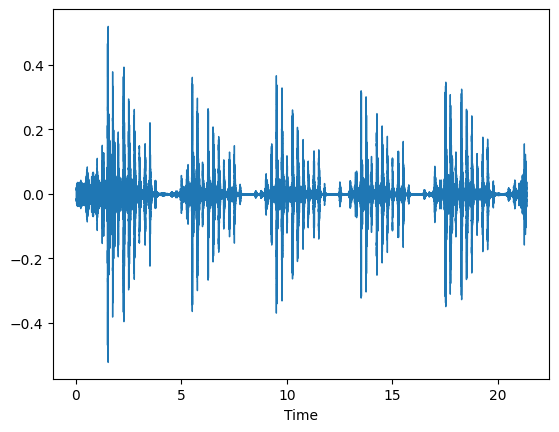

In [9]:
librosa.display.waveshow(Normalised_audio)

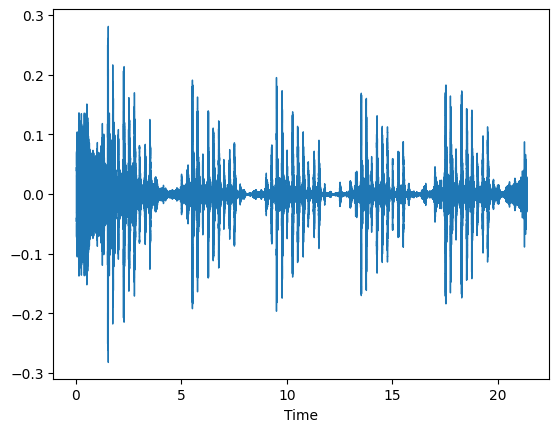

In [10]:
def pre_emphasis(audio_file,sr):
    filtered_audio=audio_file
    for i in range(len(audio_file)):
        filtered_audio[i]=filtered_audio[i]-0.9*filtered_audio[i-1]
    return filtered_audio
filtered_audio=pre_emphasis(Normalised_audio,sr)
librosa.display.waveshow(filtered_audio)
display(Audio(filtered_audio,rate=sr))

In [11]:
def framing(audio_file,frame_length,frame_shift):
    length=len(audio_file)
    no_frames=1+int(np.ceil((len(audio_file)-frame_length)/frame_shift))
    padding_length=max(0,((no_frames-1)*frame_shift+frame_length-length))
    padded_signal=np.append(audio_file,np.zeros(padding_length))    
    indices = np.tile(np.arange(frame_length), (no_frames, 1)) + \
              np.tile(np.arange(0, no_frames * frame_shift, frame_shift), (frame_length, 1)).T
    frames = padded_signal[indices.astype(np.int32)]
    frames *= np.hamming(frame_length)
    return frames

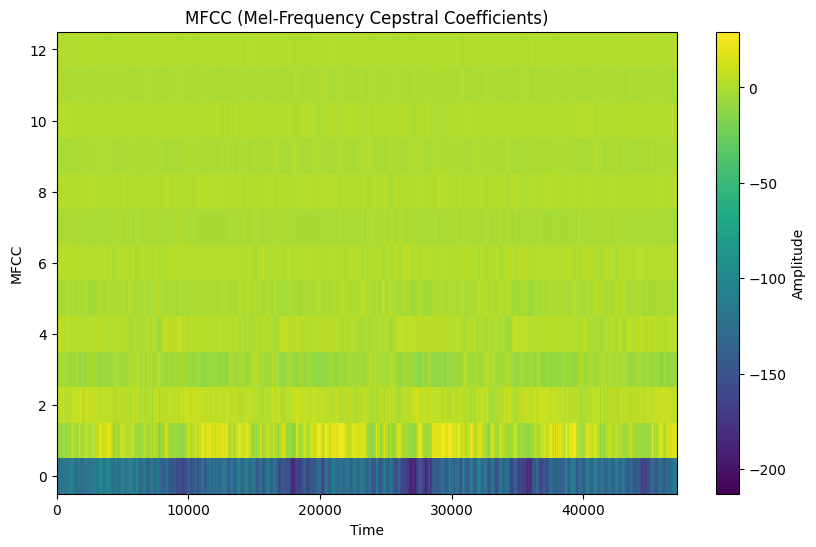

In [12]:
def MFCC(audio_file,sr,n_mfcc):
    n_fft=512
    filtered_audio=pre_emphasis(audio_file,sr)
    frames=framing(filtered_audio,25,10)
    fft_frames=np.abs(np.fft.rfft(frames,n_fft))
    power_spectrum=(fft_frames**2)*(1/n_fft)
    mel_filters = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=40)
    mel_energies = np.dot(power_spectrum, mel_filters.T)
    mel_energies = np.where(mel_energies == 0, np.finfo(float).eps, mel_energies)
    log_mel_energies = np.log(mel_energies)
    mfcc = dct(log_mel_energies, type=2, axis=1, norm='ortho')[:, :n_mfcc]
    plt.figure(figsize=(10, 6))
    plt.imshow(mfcc.T, interpolation='nearest', aspect='auto', origin='lower')  
    plt.title("MFCC (Mel-Frequency Cepstral Coefficients)")
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    plt.colorbar(label="Amplitude")
    plt.show()
MFCC(Normalised_audio,sr,13)

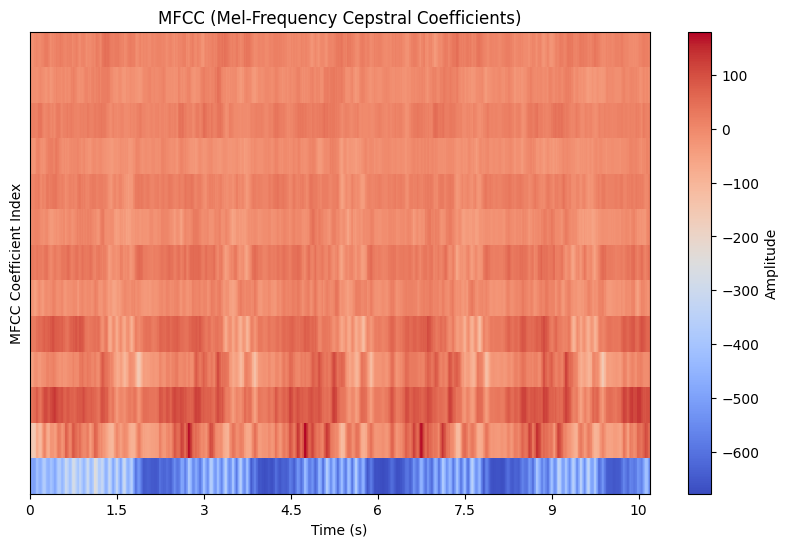

In [13]:
n_mfcc = 13 
mfcc = librosa.feature.mfcc(y=Normalised_audio, sr=sr, n_mfcc=n_mfcc)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar(label='Amplitude')
plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Time (s)')
plt.show()